In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
plt.rcdefaults()
from matplotlib.pyplot import figure

In [2]:
big_df = pd.read_csv("Dataset-V3.csv")


big_df=big_df.replace({"South Korea":"Korea Republic"})
big_df = big_df.replace({"Iran":"IR Iran"})
big_df = big_df.replace({"Soviet Union":"Russia"})
big_df = big_df.replace({"Czechoslovakia":"Czech Republic"})

C:\Users\ASUS\Anaconda3\envs\python\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
big_df.columns =['Date/Time', 'home_score', 'away_score', 'home_team', 'away_team', 'date_minus_1year',
       'goals_past1', 'goals_past2', 'nb_draws1', 'nb_draws2', 'nb_draws_opp1',
       'nb_draws_opp2', 'nb_losses1', 'nb_losses2', 'nb_losses_opp1',
       'nb_losses_opp2', 'nb_matches1', 'nb_matches2', 'nb_wins1', 'nb_wins2',
       'nb_wins_opp1', 'nb_wins_opp2', 'ratio_draws1', 'ratio_draws2',
       'ratio_draws_opp1', 'ratio_draws_opp2', 'ratio_goals_past1',
       'ratio_goals_past2', 'ratio_losses1', 'ratio_losses2',
       'ratio_losses_opp1', 'ratio_losses_opp2', 'ratio_wins1', 'ratio_wins2',
       'ratio_wins_opp1', 'ratio_wins_opp2']

# Compute the Strength of countries

In [4]:
countries = list(set(big_df["home_team"]).union(set(big_df["away_team"])))
countries_dict = {}
for i in range(len(countries)):
    countries_dict[countries[i]] = []

In [5]:
for i in range (len(big_df['home_team'])):
    total_goal = big_df['home_score'][i]+big_df['away_score'][i]
    if total_goal !=0:
        ratio_home_team = big_df['home_score'][i]/total_goal
        ratio_away_team = big_df['away_score'][i]/total_goal
        
        countries_dict[big_df['home_team'][i]].append(ratio_home_team)
        countries_dict[big_df['away_team'][i]].append(ratio_away_team)

    else:
        countries_dict[big_df['home_team'][i]].append(0)
        countries_dict[big_df['away_team'][i]].append(0)

In [6]:
strength={}
for key in countries_dict.keys():
    print(key ,np.mean(countries_dict[key]))
    strength.update({key:np.mean(countries_dict[key])})

East Timor 0.25563336445689383
Greenland 0.1878787878787879
Tunisia 0.4956515151515152
Argentina 0.585005369307695
Uruguay 0.5004601684179149
Mexico 0.5569401621559895
Swaziland 0.3037906928751999
Togo 0.41979741582167457
Peru 0.415349744417541
Slovenia 0.44315217391304346
Uganda 0.5004585819912453
Wales 0.4135831039946627
Uzbekistan 0.5143798230754753
Portugal 0.5547114608555286
Paraguay 0.4491025552803009
Hungary 0.5335788417931275
Saarland 0.2638888888888889
Serbia 0.5356656628395758
Virgin Islands 0.1689380064380064
Faroe Islands 0.21850793650793648
American Samoa 0.16375516018373162
Manchukuo 0.0
Cameroon 0.5070070619186532
Oman 0.4434951013898382
USA 0.4860410475707279
Philippines 0.3429515150721857
Rwanda 0.40590062111801245
Vietnam 0.44505672898530035
Papua New Guinea 0.4076503929877633
Ivory Coast 0.5556922398589065
Nepal 0.26960557960557957
Guam 0.272651652461341
Cape Verde 0.41942396313364044
Scotland 0.5103214977851606
Japan 0.535771193264778
Tanzania 0.4043589253883371
Sam

In [7]:
strength_sorted =sorted(strength.items(), key=lambda x: x[1],reverse=True)

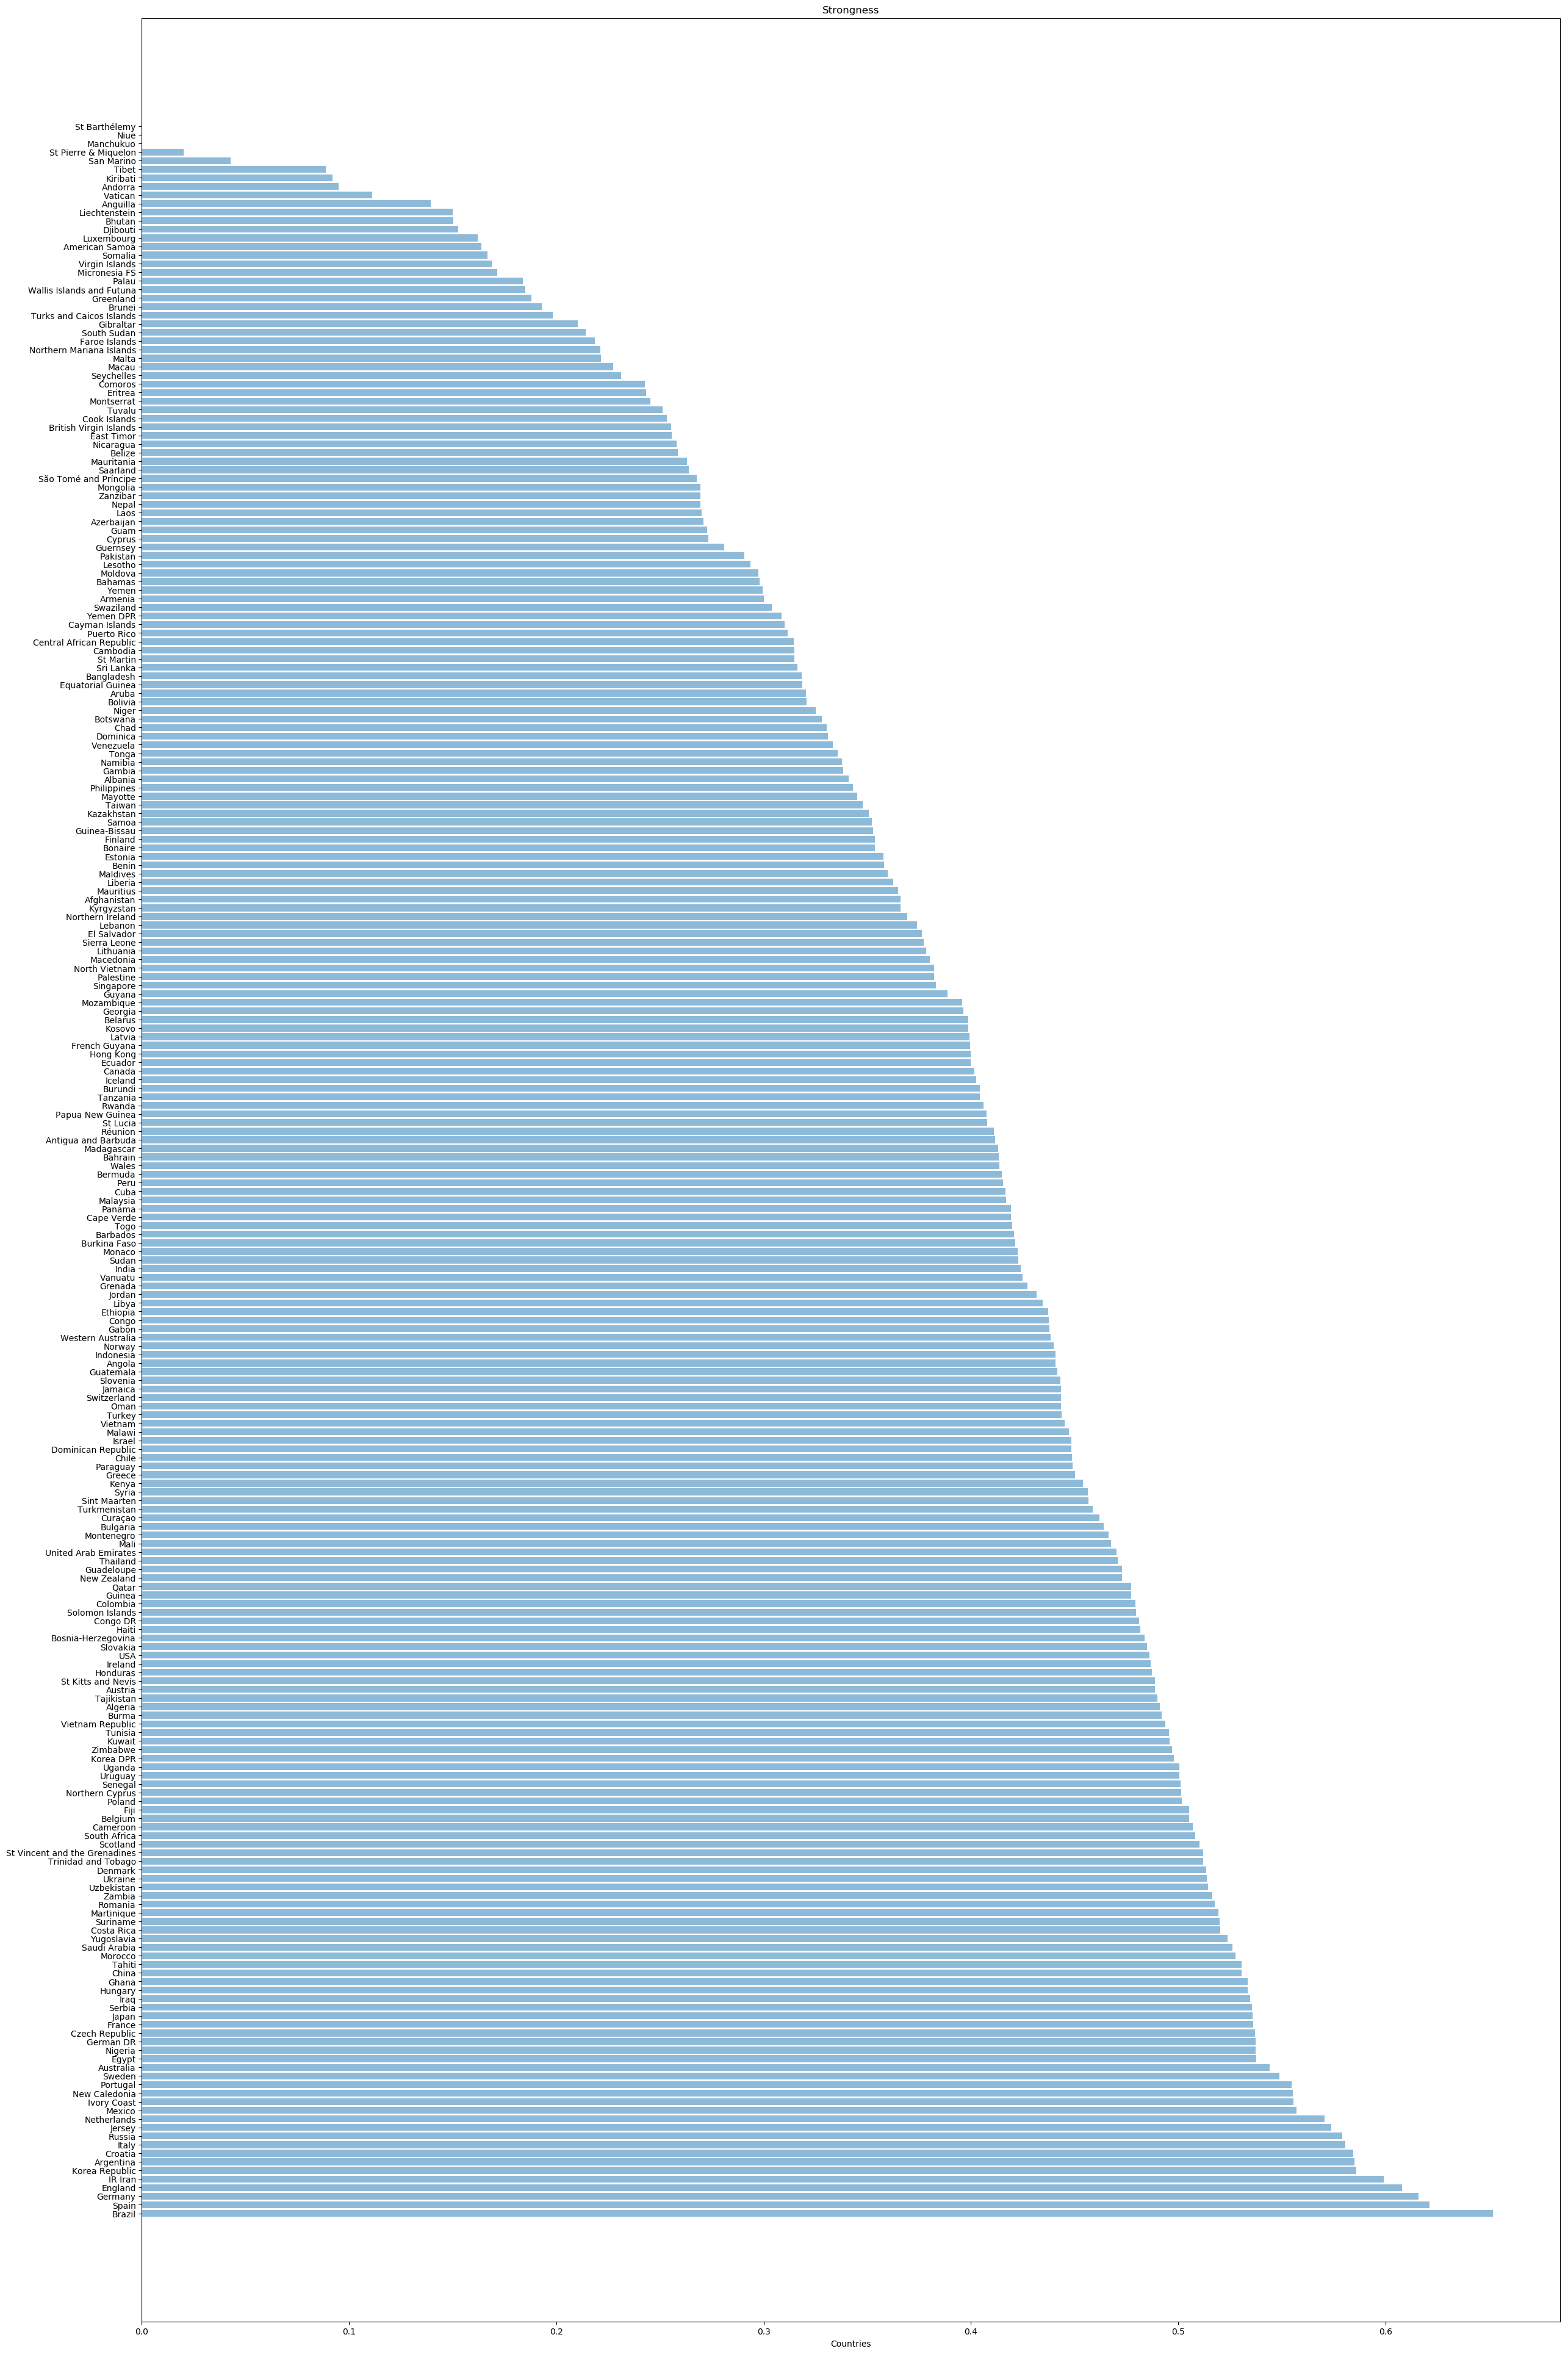

In [8]:
figure(num=None, figsize=(30,50), dpi=100, facecolor='w', edgecolor='k')
 
objects = [x[0] for x in strength_sorted]
y_pos = np.arange(len(objects))
performance = [x[1] for x in strength_sorted]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Countries')
plt.title('Strongness')
 
plt.show()

# Strong / Week Countries by threshold
(Countries that have more than the thresold are considered strong, others are considered weak)

In [9]:
x_axis =  [x[0] for x in strength_sorted]
y_axis =  [x[1] for x in strength_sorted]

def threshold(t,x_axis,y_axis):
    strong=[]
    weak =[]
    
    for index, x in enumerate(y_axis):
        if y_axis[index] > t:
            strong.append(x_axis[index])
        else:
            weak.append(x_axis[index])
    return strong,weak

In [10]:
strong_countries, weak_countries = threshold(0.3,x_axis,y_axis)

## Strong Countries Vs week Countries
Strong countries corresponding to the threshhold = 0.6 are **England**, **Germany**, **Brazil**, **Spain**

In [11]:
strong_df = big_df[(big_df.home_team =='England')|(big_df.home_team =='Germany')|(big_df.home_team =='Brazil')|(big_df.home_team =='Spain')|(big_df.away_team =='England')|(big_df.away_team =='Germany')|(big_df.away_team =='Brazil')|(big_df.away_team =='Spain')]

In [12]:
strong_df.head()

,Date/Time,home_score,away_score,home_team,away_team,date_minus_1year,goals_past1,goals_past2,nb_draws1,nb_draws2,...,ratio_goals_past1,ratio_goals_past2,ratio_losses1,ratio_losses2,ratio_losses_opp1,ratio_losses_opp2,ratio_wins1,ratio_wins2,ratio_wins_opp1,ratio_wins_opp2
10,2018-03-27,1,1,England,Italy,2017-03-27,13,21,3,2,...,0.684211,0.724138,0.111111,0.272727,0.0,0.0,0.555556,0.545455,0.0,0.0
11,2018-03-27,6,1,Spain,Argentina,2017-03-27,30,16,3,3,...,0.810811,0.666667,0.000000,0.200000,0.0,0.0,0.700000,0.500000,0.0,0.0
25,2018-03-27,0,1,Germany,Brazil,2017-03-27,39,19,5,3,...,0.764706,0.863636,0.000000,0.100000,0.0,0.0,0.642857,0.600000,0.0,0.0
82,2018-03-23,0,1,Netherlands,England,2017-03-23,25,14,0,3,...,0.694444,0.700000,0.272727,0.111111,0.0,0.0,0.727273,0.555556,0.0,0.0
88,2018-03-23,0,3,Russia,Brazil,2017-03-23,18,16,4,3,...,0.529412,0.842105,0.363636,0.111111,0.0,0.0,0.272727,0.555556,0.0,0.0


In [13]:
df_compare = strong_df[((strong_df.home_team == "England") |(strong_df.away_team == "England")) &(strong_df.home_score ==strong_df.away_score)]


In [14]:
df_compare.iloc[0]

Date/Time            2018-03-27
home_score                    1
away_score                    1
home_team               England
away_team                 Italy
date_minus_1year     2017-03-27
goals_past1                  13
goals_past2                  21
nb_draws1                     3
nb_draws2                     2
nb_draws_opp1                 0
nb_draws_opp2                 0
nb_losses1                    5
nb_losses2                    6
nb_losses_opp1                0
nb_losses_opp2                0
nb_matches1                   9
nb_matches2                  11
nb_wins1                      5
nb_wins2                      6
nb_wins_opp1                  0
nb_wins_opp2                  0
ratio_draws1           0.333333
ratio_draws2           0.181818
ratio_draws_opp1              0
ratio_draws_opp2              0
ratio_goals_past1      0.684211
ratio_goals_past2      0.724138
ratio_losses1          0.111111
ratio_losses2          0.272727
ratio_losses_opp1             0
ratio_lo

In [15]:
df_compare.to_csv("./temp.csv")
df_compare = pd.read_csv("./temp.csv")

df_compare = df_compare[df_compare['date_minus_1year'].notnull()]

In [16]:
nb_draws1 =[]
nb_draws2 =[] 

nb_losses1 = [] 
nb_losses2 = []

nb_wins1 = []  
nb_wins2 = []


for i in range(len(df_compare['home_score'])):
    if df_compare['home_team'][i] == "England":
        nb_draws1.append(df_compare['nb_draws1'])
        nb_losses1.append(df_compare['nb_losses1'])
        nb_wins1.append(df_compare['nb_wins1'])
        
        
        nb_draws2.append(df_compare['nb_draws2'])
        nb_losses2.append(df_compare['nb_losses2'])
        nb_wins2.append(df_compare['nb_wins2'])
        
    else:
        
        nb_draws1.append(df_compare['nb_draws2'])
        nb_losses1.append(df_compare['nb_losses2'])
        nb_wins1.append(df_compare['nb_wins2'])
        
        nb_draws2.append(df_compare['nb_draws1'])
        nb_losses2.append(df_compare['nb_losses1'])
        nb_wins2.append(df_compare['nb_wins1'])

In [17]:
nb_draws1_mean = np.mean(nb_draws1)
nb_draws2_mean = np.mean(nb_draws2) 

nb_losses1_mean =np.mean(nb_losses1)
nb_losses2_mean =np.mean(nb_losses2)

nb_wins1_mean = np.mean(nb_wins1)
nb_wins2_mean = np.mean(nb_wins2)

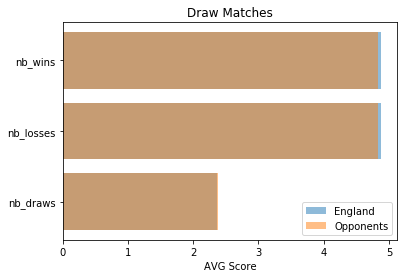

In [18]:
objects = ['nb_draws','nb_losses','nb_wins']
y_pos = np.arange(len(objects))
performance = [nb_draws1_mean, nb_losses1_mean, nb_wins1_mean]
performance1 =[nb_draws2_mean, nb_losses2_mean, nb_wins2_mean]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.barh(y_pos, performance1,align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('AVG Score')
plt.title('Draw Matches')
plt.legend(['England','Opponents'])
plt.show()

In [19]:
big_df[((big_df.home_team =='Armenia') & (big_df.away_team =='Spain'))|((big_df.away_team =='Armenia') &(big_df.home_team == 'Spain'))]

,Date/Time,home_score,away_score,home_team,away_team,date_minus_1year,goals_past1,goals_past2,nb_draws1,nb_draws2,...,ratio_goals_past1,ratio_goals_past2,ratio_losses1,ratio_losses2,ratio_losses_opp1,ratio_losses_opp2,ratio_wins1,ratio_wins2,ratio_wins_opp1,ratio_wins_opp2
7713,2009-10-10,1,2,Armenia,Spain,2008-10-10,6,41,2,0,...,0.272727,0.836735,0.625000,0.066667,0.0,0.0,0.125000,0.933333,0.0,0.0
8650,2008-09-10,4,0,Spain,Armenia,2007-09-10,30,7,2,3,...,0.857143,0.368421,0.000000,0.416667,0.0,0.0,0.882353,0.333333,0.0,0.0
13233,2003-10-11,0,4,Armenia,Spain,2002-10-11,5,21,0,3,...,0.294118,0.807692,0.714286,0.090909,1.0,0.0,0.285714,0.636364,0.0,1.0
13695,2003-04-02,3,0,Spain,Armenia,2002-04-02,27,5,5,1,...,0.750000,0.454545,0.000000,0.400000,0.0,0.0,0.615385,0.400000,0.0,0.0
20106,1995-06-07,1,0,Spain,Armenia,1994-06-07,30,3,5,2,...,0.731707,0.272727,0.066667,0.500000,0.0,1.0,0.600000,0.166667,1.0,0.0
20199,1995-04-26,0,2,Armenia,Spain,1994-04-26,1,30,1,5,...,0.166667,0.714286,0.600000,0.066667,0.0,0.0,0.200000,0.600000,0.0,0.0
46483,2009-10-10,2,1,Spain,Armenia,NaN,41,6,0,2,...,0.836735,0.272727,0.066667,0.625000,0.0,0.0,0.933333,0.125000,0.0,0.0
47420,2008-09-10,0,4,Armenia,Spain,NaN,7,30,3,2,...,0.368421,0.857143,0.416667,0.000000,0.0,0.0,0.333333,0.882353,0.0,0.0
52003,2003-10-11,4,0,Spain,Armenia,NaN,21,5,3,0,...,0.807692,0.294118,0.090909,0.714286,0.0,1.0,0.636364,0.285714,1.0,0.0
52465,2003-04-02,0,3,Armenia,Spain,NaN,5,27,1,5,...,0.454545,0.750000,0.400000,0.000000,0.0,0.0,0.400000,0.615385,0.0,0.0


In [20]:
big_df[((big_df.home_team =='Brazil') & (big_df.away_team =='Spain'))|((big_df.away_team =='Brazil') &(big_df.home_team == 'Spain'))]

,Date/Time,home_score,away_score,home_team,away_team,date_minus_1year,goals_past1,goals_past2,nb_draws1,nb_draws2,...,ratio_goals_past1,ratio_goals_past2,ratio_losses1,ratio_losses2,ratio_losses_opp1,ratio_losses_opp2,ratio_wins1,ratio_wins2,ratio_wins_opp1,ratio_wins_opp2
4150,2013-06-30,3,0,Brazil,Spain,2012-06-30,52,46,5,3,...,0.764706,0.867925,0.105263,0.000000,0.0,0.0,0.631579,0.812500,0.0,0.0
16747,1999-11-13,0,0,Spain,Brazil,1998-11-13,45,60,1,2,...,0.900000,0.759494,0.000000,0.136364,0.0,0.0,0.888889,0.772727,0.0,0.0
22798,1990-09-12,3,0,Spain,Brazil,1989-09-12,19,11,2,2,...,0.655172,0.611111,0.181818,0.200000,0.0,0.0,0.636364,0.600000,0.0,0.0
24801,1986-06-01,0,1,Spain,Brazil,1985-06-01,14,24,1,3,...,0.875000,0.685714,0.000000,0.166667,0.0,0.0,0.857143,0.583333,0.0,0.0
27152,1981-07-08,1,0,Brazil,Spain,1980-07-08,43,10,2,4,...,0.796296,0.454545,0.058824,0.300000,0.0,0.0,0.823529,0.300000,0.0,0.0
28463,1978-06-07,0,0,Brazil,Spain,1977-06-07,25,13,6,1,...,0.781250,0.764706,0.071429,0.125000,0.0,0.0,0.500000,0.750000,0.0,0.0
33817,1962-06-06,2,1,Brazil,Spain,1961-06-06,24,8,1,1,...,0.827586,0.666667,0.000000,0.166667,0.0,0.0,0.888889,0.666667,0.0,0.0
35815,1950-07-13,6,1,Brazil,Spain,1949-07-13,26,15,2,2,...,0.684211,0.714286,0.125000,0.000000,0.0,0.0,0.625000,0.666667,0.0,0.0
37249,1934-05-27,1,3,Brazil,Spain,1933-05-27,0,11,0,0,...,0.000000,0.916667,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.0
42920,2013-06-30,0,3,Spain,Brazil,NaN,46,52,3,5,...,0.867925,0.764706,0.000000,0.105263,0.0,0.0,0.812500,0.631579,0.0,0.0
